In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# load mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [26]:
# normalising data
gray_scale = 255
x_train = x_train.astype("float32") / gray_scale
x_test = x_test.astype("float32") / gray_scale

print(f"Feature matrix (x_train): {x_train.shape}")
print(f"Target matrix (y_train): {y_train.shape}")
print(f"Test feature matrix (x_test): {x_test.shape}")
print(f"Test target matrix (y_test): {y_test.shape}")
type(x_train)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Test feature matrix (x_test): (10000, 28, 28)
Test target matrix (y_test): (10000,)


numpy.ndarray

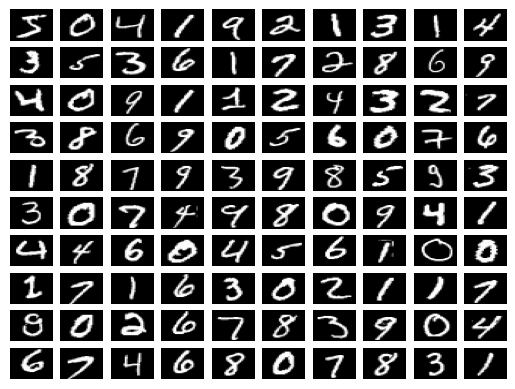

In [27]:
# visualising
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto', cmap="gray")
        k += 1
        ax[i, j].axis("off")
plt.show()

In [28]:
# building the sequential neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(128, activation="relu", kernel_regularizer=l2(0.001)), 
    Dropout(0.3),
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

C:\Users\Ameya Prashant\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# compiling the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
# training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6871 - loss: 1.4196 - val_accuracy: 0.9483 - val_loss: 0.4908
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9289 - loss: 0.5447 - val_accuracy: 0.9607 - val_loss: 0.3750
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9477 - loss: 0.4205 - val_accuracy: 0.9632 - val_loss: 0.3237
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9543 - loss: 0.3581 - val_accuracy: 0.9718 - val_loss: 0.2787
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9560 - loss: 0.3321 - val_accuracy: 0.9704 - val_loss: 0.2634
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9590 - loss: 0.3038 - val_accuracy: 0.9682 - val_loss: 0.2614
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9604 - loss: 0.2920 - val_accuracy: 0.9697 - val_loss: 0.2486
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9626 - loss: 0.2793 - val_accur

In [33]:
results = model.evaluate(x_test, y_test, verbose=0)
print(f"[test loss, test accuracy]: {results}")

[test loss, test accuracy]: [0.2094409465789795, 0.9746999740600586]


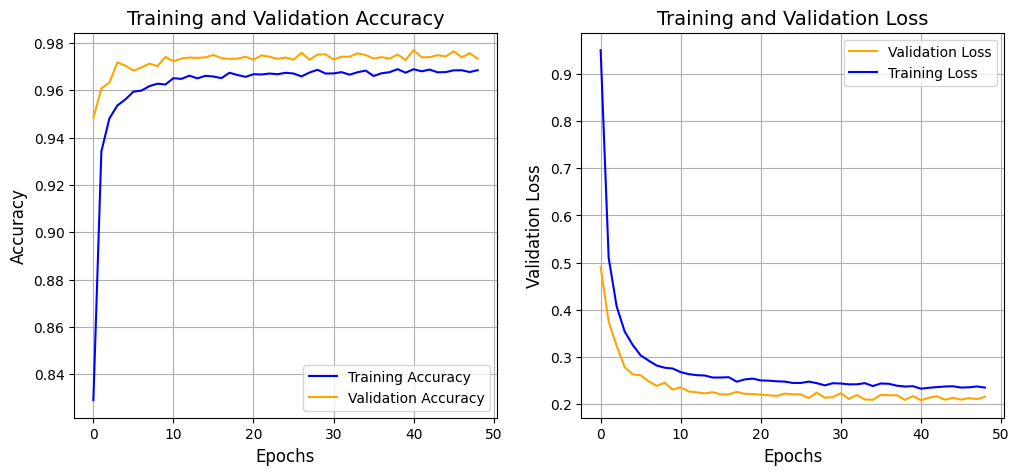

In [34]:
# visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.title("Training and Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Loss", fontsize=12)
plt.legend()
plt.grid(True)

## Inferences
1) the graph on the left shows, training accuracy is almost 1. However, validation accuracy is lower. This indicates overfitting as the model fails to generalize data.
2) Training loss almost reaches 0. Validation loss maintains 0.1. This indicates model hasnt learnt some features properly. Probably lacks some details